In [2]:
#PROBLEM STATEMENT: Implement a logistic regression model on given dataset and check the accuracy for test dataset.

In [3]:
#DESCRIPTION OF DATASET: Name: titanic.csv

In [8]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [9]:
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [10]:
%matplotlib inline
rcParams['figure.figsize']=10,8
sb.set_style('whitegrid')

In [18]:
titanic=pd.read_csv("Titanic.csv")
titanic.columns=['Passengersid','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,Passengersid,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\ratha\AppData\Local\Temp\ipykernel_8144\4291760999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Survived',data=titanic,palette='hls')


<Axes: xlabel='Survived', ylabel='count'>

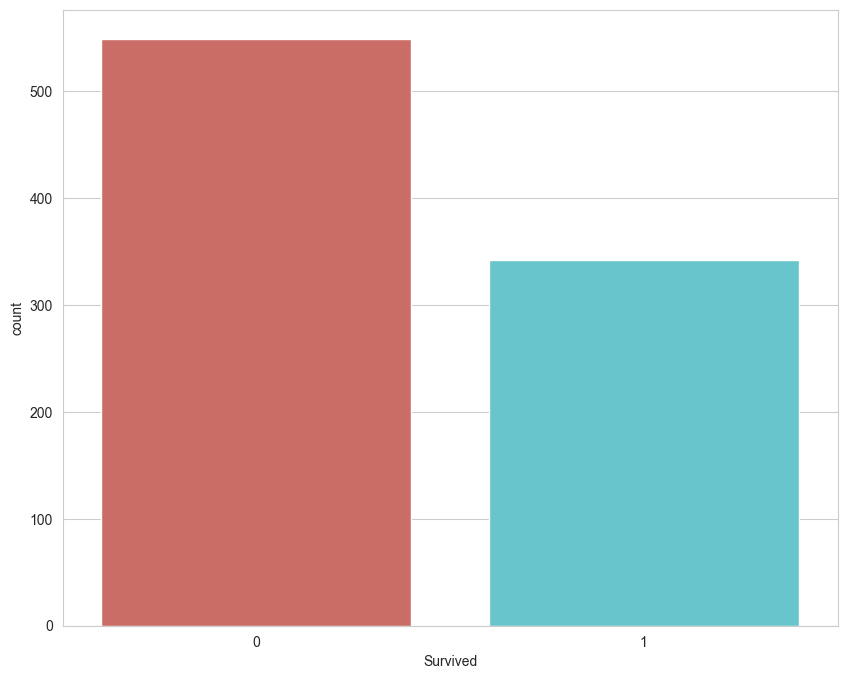

In [19]:
#Checking that your target variable is binary
sb.countplot(x='Survived',data=titanic,palette='hls')

In [20]:
titanic.isnull().sum()

Passengersid      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passengersid  891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
#Taking care of missing values and dropping missing values

In [44]:
titanic_data=titanic.drop(columns=['Passengersid','Name','Ticket','Cabin'],axis = 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\Users\ratha\AppData\Local\Temp\ipykernel_8144\3753840260.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Pclass',y='Age',data=titanic_data,palette='hls')


<Axes: xlabel='Pclass', ylabel='Age'>

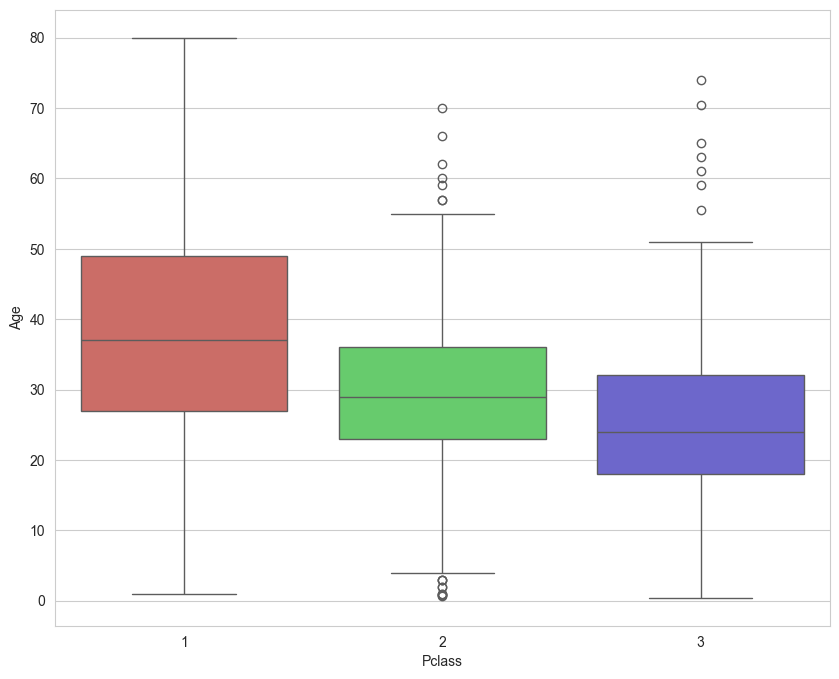

In [45]:
sb.boxplot(x='Pclass',y='Age',data=titanic_data,palette='hls')

In [46]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [48]:
titanic_data['Sex']=titanic_data['Sex'].astype("category")
titanic_data['Sex']=titanic_data['Sex'].cat.codes

In [49]:
titanic_data.drop(columns = ['Fare','Pclass','Embarked'],axis=1,inplace=True)
titanic_data.head()

,Survived,Sex,Age,SibSp,Parch
0,0,1,22.0,1,0
1,1,0,38.0,1,0
2,1,0,26.0,0,0
3,1,0,35.0,1,0
4,0,1,35.0,0,0


In [50]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Sex       712 non-null    int8   
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
dtypes: float64(1), int64(3), int8(1)
memory usage: 28.5 KB


<Axes: >

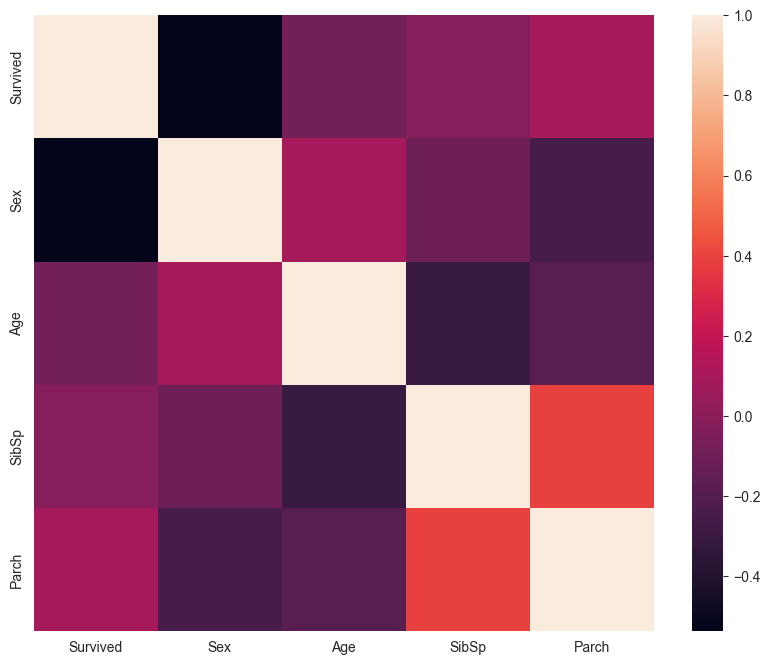

In [51]:
sb.heatmap(titanic_data.corr())

In [83]:
#splitting data
x=titanic_data.iloc[:, 1:5].values
y=titanic_data.iloc[:,0:1].values

In [84]:
print(x)

[[ 1. 22.  1.  0.]
 [ 0. 38.  1.  0.]
 [ 0. 26.  0.  0.]
 ...
 [ 0. 19.  0.  0.]
 [ 1. 26.  0.  0.]
 [ 1. 32.  0.  0.]]


In [85]:
print(y)

[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]


In [86]:
#Fitting the logistic Regression Model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=25)
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(x_train,y_train)

C:\Users\ratha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [87]:
#Confusion Matrix
y_pred=LogReg.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[101,  24],
       [ 25,  64]], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7710280373831776

In [89]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       125
           1       0.73      0.72      0.72        89

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214

